# **Homework Unsupervised Learning**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [ ]:
df = pd.read_csv('flight.csv') # Import dataset flight.csv
df.head()

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993  11/2/2006        12/24/2008   Male         6            .   
1      28065  2/19/2007          8/3/2007   Male         6          NaN   
2      55106   2/1/2007         8/30/2007   Male         6            .   
3      21189  8/22/2008         8/23/2008   Male         5  Los Angeles   
4      39546  4/10/2009         4/15/2009   Male         6      guiyang   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0       beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
1       beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
2       beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
3            CA           US  64.0  3/31/2014  ...  125500.0      281336   
4       guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   

   LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  EXCHANGE_COUNT  \
0         3/31/2014            1      3.483254           18              34   
1         3/25/2014            7      5.194245           17              29   
2         3/21/2014           11      5.298507           18              20   
3        12/26/2013           97     27.863636           73              11   
4         3/27/2014            5      4.788079           47              27   

   avg_discount  Points_Sum  Point_NotFlight  
0      0.961639      619760               50  
1      1.252314      415768               33  
2      1.254676      406361               26  
3      1.090870      372204               12  
4      0.970658      338813               39  

[5 rows x 23 columns]

# **1. Lakukan EDA pada dataset untuk mendapatkan pemahaman umum mengenai data dan memandu proses feature engineering**

a. Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong, bebas dari duplikat, dan berada di range value yang tepat<br>
b. Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal)<br>
c. Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain<br>

In [ ]:
df.info() # Memeriksa tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

**Hasil Analisa:**

 Kolom FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE sebenarnya
 perlu diubah menjadi tipe data datetime untuk mewakili tanggal dan waktu dengan benar. selebihnya kolom sudah memiliki tipe data yang tepat

In [ ]:
# Melakukan pengecekan data kosong
for i in df.columns:
  if df[i].isnull().sum()>0:
    print('Kolom', i)
    print('Jumlah Nilai Kosong  :', df[i].isnull().sum())
    print('tipe data            :', df[i].dtypes)
    print()

Kolom GENDER
Jumlah Nilai Kosong  : 3
tipe data            : object

Kolom WORK_CITY
Jumlah Nilai Kosong  : 2269
tipe data            : object

Kolom WORK_PROVINCE
Jumlah Nilai Kosong  : 3248
tipe data            : object

Kolom WORK_COUNTRY
Jumlah Nilai Kosong  : 26
tipe data            : object

Kolom AGE
Jumlah Nilai Kosong  : 420
tipe data            : float64

Kolom SUM_YR_1
Jumlah Nilai Kosong  : 551
tipe data            : float64

Kolom SUM_YR_2
Jumlah Nilai Kosong  : 138
tipe data            : float64



**Statistical Summary 1**

In [ ]:
df.describe()

MEMBER_NO      FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM  \
count  62988.000000  62988.000000  62568.000000  62988.000000   62988.000000   
mean   31494.500000      4.102162     42.476346     11.839414   10925.081254   
std    18183.213715      0.373856      9.885915     14.049471   16339.486151   
min        1.000000      4.000000      6.000000      2.000000       0.000000   
25%    15747.750000      4.000000     35.000000      3.000000    2518.000000   
50%    31494.500000      4.000000     41.000000      7.000000    5700.000000   
75%    47241.250000      4.000000     48.000000     15.000000   12831.000000   
max    62988.000000      6.000000    110.000000    213.000000  505308.000000   

            SUM_YR_1       SUM_YR_2     SEG_KM_SUM   LAST_TO_END  \
count   62437.000000   62850.000000   62988.000000  62988.000000   
mean     5355.376064    5604.026014   17123.878691    176.120102   
std      8109.450147    8703.364247   20960.844623    183.822223   
min         0.000000       0.000000     368.000000      1.000000   
25%      1003.000000     780.000000    4747.000000     29.000000   
50%      2800.000000    2773.000000    9994.000000    108.000000   
75%      6574.000000    6845.750000   21271.250000    268.000000   
max    239560.000000  234188.000000  580717.000000    731.000000   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount   Points_Sum  \
count  62988.000000  62988.000000    62988.000000  62988.000000   62988.0000   
mean      67.749788    166.033895        0.319775      0.721558   12545.7771   
std       77.517866    123.397180        1.136004      0.185427   20507.8167   
min        0.000000      0.000000        0.000000      0.000000       0.0000   
25%       23.370370     79.000000        0.000000      0.611997    2775.0000   
50%       44.666667    143.000000        0.000000      0.711856    6328.5000   
75%       82.000000    228.000000        0.000000      0.809476   14302.5000   
max      728.000000    728.000000       46.000000      1.500000  985572.0000   

       Point_NotFlight  
count     62988.000000  
mean          2.728155  
std           7.364164  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max         140.000000

**Hasil Analisa:**
1. Pada beberapa variabel 'FLIGHT_COUNT', 'BP_SUM', 'SEG_KM_SUM', 'MAX_INTERVAL', 'EXCHANGE_COUNT', dan 'Point_NotFlight' memiliki nilai minimum yang rendah atau nol,
2. Nilai Maksimum yang Ekstrem: Beberapa variabel juga memiliki nilai maksimum yang sangat tinggi, seperti 'SUM_YR_1', 'SUM_YR_2', 'MAX_INTERVAL', dan 'Points_Sum'.
3. Deviasi Standar yang Tinggi: Beberapa variabel memiliki deviasi standar yang sangat tinggi, seperti 'SUM_YR_1', 'SUM_YR_2', 'MAX_INTERVAL', dan 'Points_Sum'. Ini menunjukkan variasi yang besar dalam data.
4. Perbedaan Signifikan antara Kuartil 75% dan Nilai Maksimum: Pada beberapa variabel seperti 'SUM_YR_1', 'SUM_YR_2', 'MAX_INTERVAL', dan 'Points_Sum', terdapat perbedaan yang signifikan antara nilai kuartil ke-3 (75%) dan nilai maksimum. Ini mungkin mengindikasikan keberadaan outlier atau data ekstrem di bagian atas distribusi.

**Bentuk distribusi setiap kolom (numerik)**

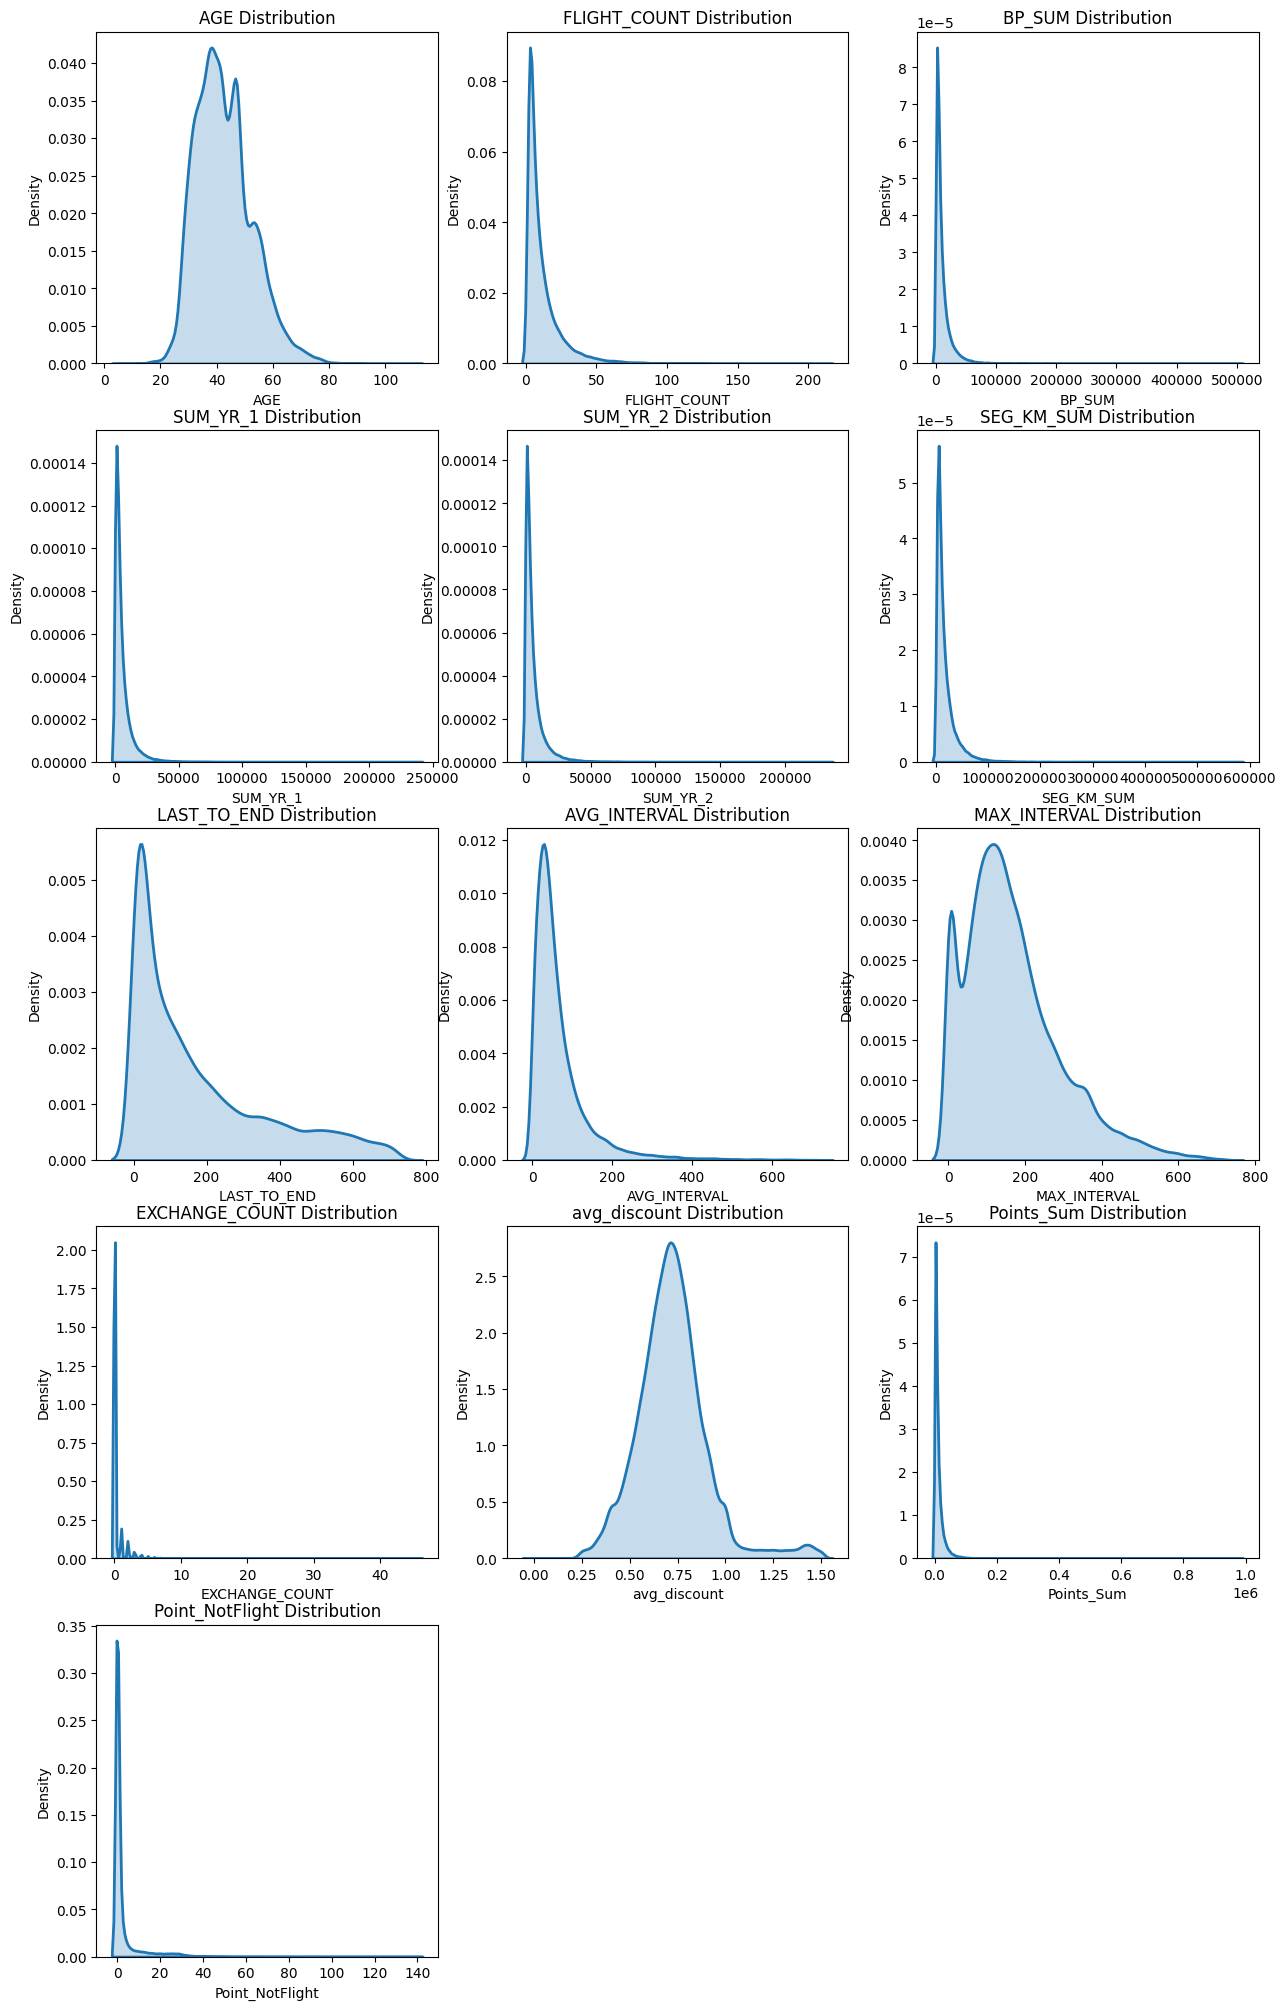

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengidentifikasi kolom yang bertipe numerik
excluded_columns = ['MEMBER_NO', 'FFP_TIER']
numeric_columns = [col for col in df.select_dtypes(include=['int', 'float']).columns if col not in excluded_columns]

# Menghitung jumlah kolom numerik
num_numeric_columns = len(numeric_columns)

# Menentukan jumlah baris dan kolom subplot
num_rows = (num_numeric_columns - 1) // 3 + 1
num_cols = min(num_numeric_columns, 3)

# Membuat subplot dengan ukuran yang sesuai
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Loop melalui kolom-kolom numerik
for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols

    # Membuat plot sesuai dengan tipe data kolom (KDE plot)
    sns.kdeplot(df[column], ax=axes[row, col], shade=True, linewidth=2)
    axes[row, col].set_title(f'{column} Distribution')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Density')

# Menghilangkan subplot yang tidak digunakan
for i in range(num_numeric_columns, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

**Keterangan:**
- Kolom AGE & avg_discount membentuk distribusi Normal skew
-Sedangkan kolom FLIGHT_COUNT,BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, LAST_TO_END,AVG_INTERVAL, MAX_INTERVAL, EXCHANGE_COUNT, Points_Sum, Point_NotFlight membentuk distribusi positively skewed

**Statistical Summary 2**

In [ ]:
df.describe(include = 'object')

FFP_DATE FIRST_FLIGHT_DATE GENDER  WORK_CITY WORK_PROVINCE  \
count       62988             62988  62985      60719         59740   
unique       3068              3406      2       3234          1165   
top     1/13/2011         2/16/2013   Male  guangzhou     guangdong   
freq          184                96  48134       9386         17509   

       WORK_COUNTRY  LOAD_TIME LAST_FLIGHT_DATE  
count         62962      62988            62988  
unique          118          1              731  
top              CN  3/31/2014        3/31/2014  
freq          57748      62988              959

 tidak ada yang terlalu aneh dalam statistik deskriptif ini.

**Kolom yang berkorelasi kuat**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
print(correlation_matrix)

                 MEMBER_NO  FFP_TIER       AGE  FLIGHT_COUNT    BP_SUM  \
MEMBER_NO         1.000000 -0.005910  0.001259     -0.000276  0.000063   
FFP_TIER         -0.005910  1.000000  0.078654      0.582447  0.581085   
AGE               0.001259  0.078654  1.000000      0.073246  0.100501   
FLIGHT_COUNT     -0.000276  0.582447  0.073246      1.000000  0.788379   
BP_SUM            0.000063  0.581085  0.100501      0.788379  1.000000   
SUM_YR_1         -0.002529  0.463122  0.111815      0.748032  0.850624   
SUM_YR_2          0.001185  0.611385  0.083743      0.794838  0.884632   
SEG_KM_SUM       -0.000032  0.522350  0.087254      0.850411  0.921724   
LAST_TO_END      -0.002588 -0.206313 -0.025600     -0.404999 -0.319039   
AVG_INTERVAL      0.002479 -0.144928 -0.024613     -0.316833 -0.246764   
MAX_INTERVAL      0.004761 -0.127641  0.009382     -0.188682 -0.147953   
EXCHANGE_COUNT   -0.003844  0.342355  0.029604      0.502501  0.530021   
avg_discount      0.001727  0.248845  

Kolom yang berkorelasi kuat:
- FLIGHT_COUNT dan SEG_KM_SUM memiliki korelasi 0.850411, yang cukup tinggi.
- BP_SUM dan SUM_YR_1 memiliki korelasi 0.850624, juga cukup tinggi.
- BP_SUM dan SUM_YR_2 memiliki korelasi 0.884632, yang juga cukup tinggi.
- BP_SUM dan Points_Sum memiliki korelasi 0.923271, yang sangat tinggi.

## Data Cleaning

**Data kosong**

- Numerik

In [ ]:
# Handling data kosong
# Menghitung median dari setiap kolom
median_values = df.median(numeric_only=True)

# Mengganti nilai-nilai yang hilang dengan median dari masing-masing kolom
df.fillna(median_values, inplace=True)

- Kategorik

In [ ]:
# Mengganti data kosong dengan modus karena memiliki jumlah data kosong yang relatif sedikit jika dibandingkan dengan total keseluruhan data
# Mengganti nilai-nilai yang hilang dalam kolom 'GENDER' dengan modus dari kolom 'GENDER'
df['GENDER'].fillna(df['GENDER'].mode().iloc[0], inplace=True)

# Mengganti nilai-nilai yang hilang dalam kolom 'WORK_COUNTRY' dengan modus dari kolom 'WORK_COUNTRY'
df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode().iloc[0], inplace=True)

In [ ]:
#melakukan pemerksaan apakah terdapat kolom yang masih kosong
kolom_kosong = df.columns[df.isna().any()].tolist()
kolom_kosong

['WORK_CITY', 'WORK_PROVINCE']

In [ ]:
# Mengganti nilai-nilai yang hilang dalam kolom kategorikal dengan label "Unknown" karena umlah data yang kosong cukup banyak dan masih memiliki
#kemungkinan untuk dilakukannya segmentasi bagi customer
df['WORK_CITY'].fillna("Unknown", inplace=True)
df['WORK_PROVINCE'].fillna("Unknown", inplace=True)

In [ ]:
#melakukan pemerksaan apakah terdapat kolom yang masih kosong
kolom_kosong = df.columns[df.isna().any()].tolist()
kolom_kosong

[]

**Data Duplicate**

In [ ]:
#melakukan pemeriksaan apabila terdapat data yang duplicate secara keseluruhan
df.duplicated().sum()

0

**Format Update**

In [ ]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62988 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          62988 non-null  object        
 6   WORK_PROVINCE      62988 non-null  object        
 7   WORK_COUNTRY       62988 non-null  object        
 8   AGE                62988 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62988 non-null  float64       
 13  SUM_YR_2           62988 non-null  float64       
 14  SEG_KM

In [ ]:
cont = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
cont

['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight']

In [ ]:
cat = df.loc[:, (df.dtypes != int) & (df.dtypes != float) & (df.columns != 'publish_daytype') & ((df.columns != 'trending_daytype'))].columns.tolist()
cat

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

# 2.  Pilih fitur-fitur yang menurut teman-teman masuk akal secara  bisnis untuk digunakan sebagai fitur clustering. Lakukan  feature engineering!

a. Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur
clustering. Tulis alasan teman-teman memilih fitur tersebut.

b. Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman
pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).



**Explore Data dengan Univariate dan Multivariate**

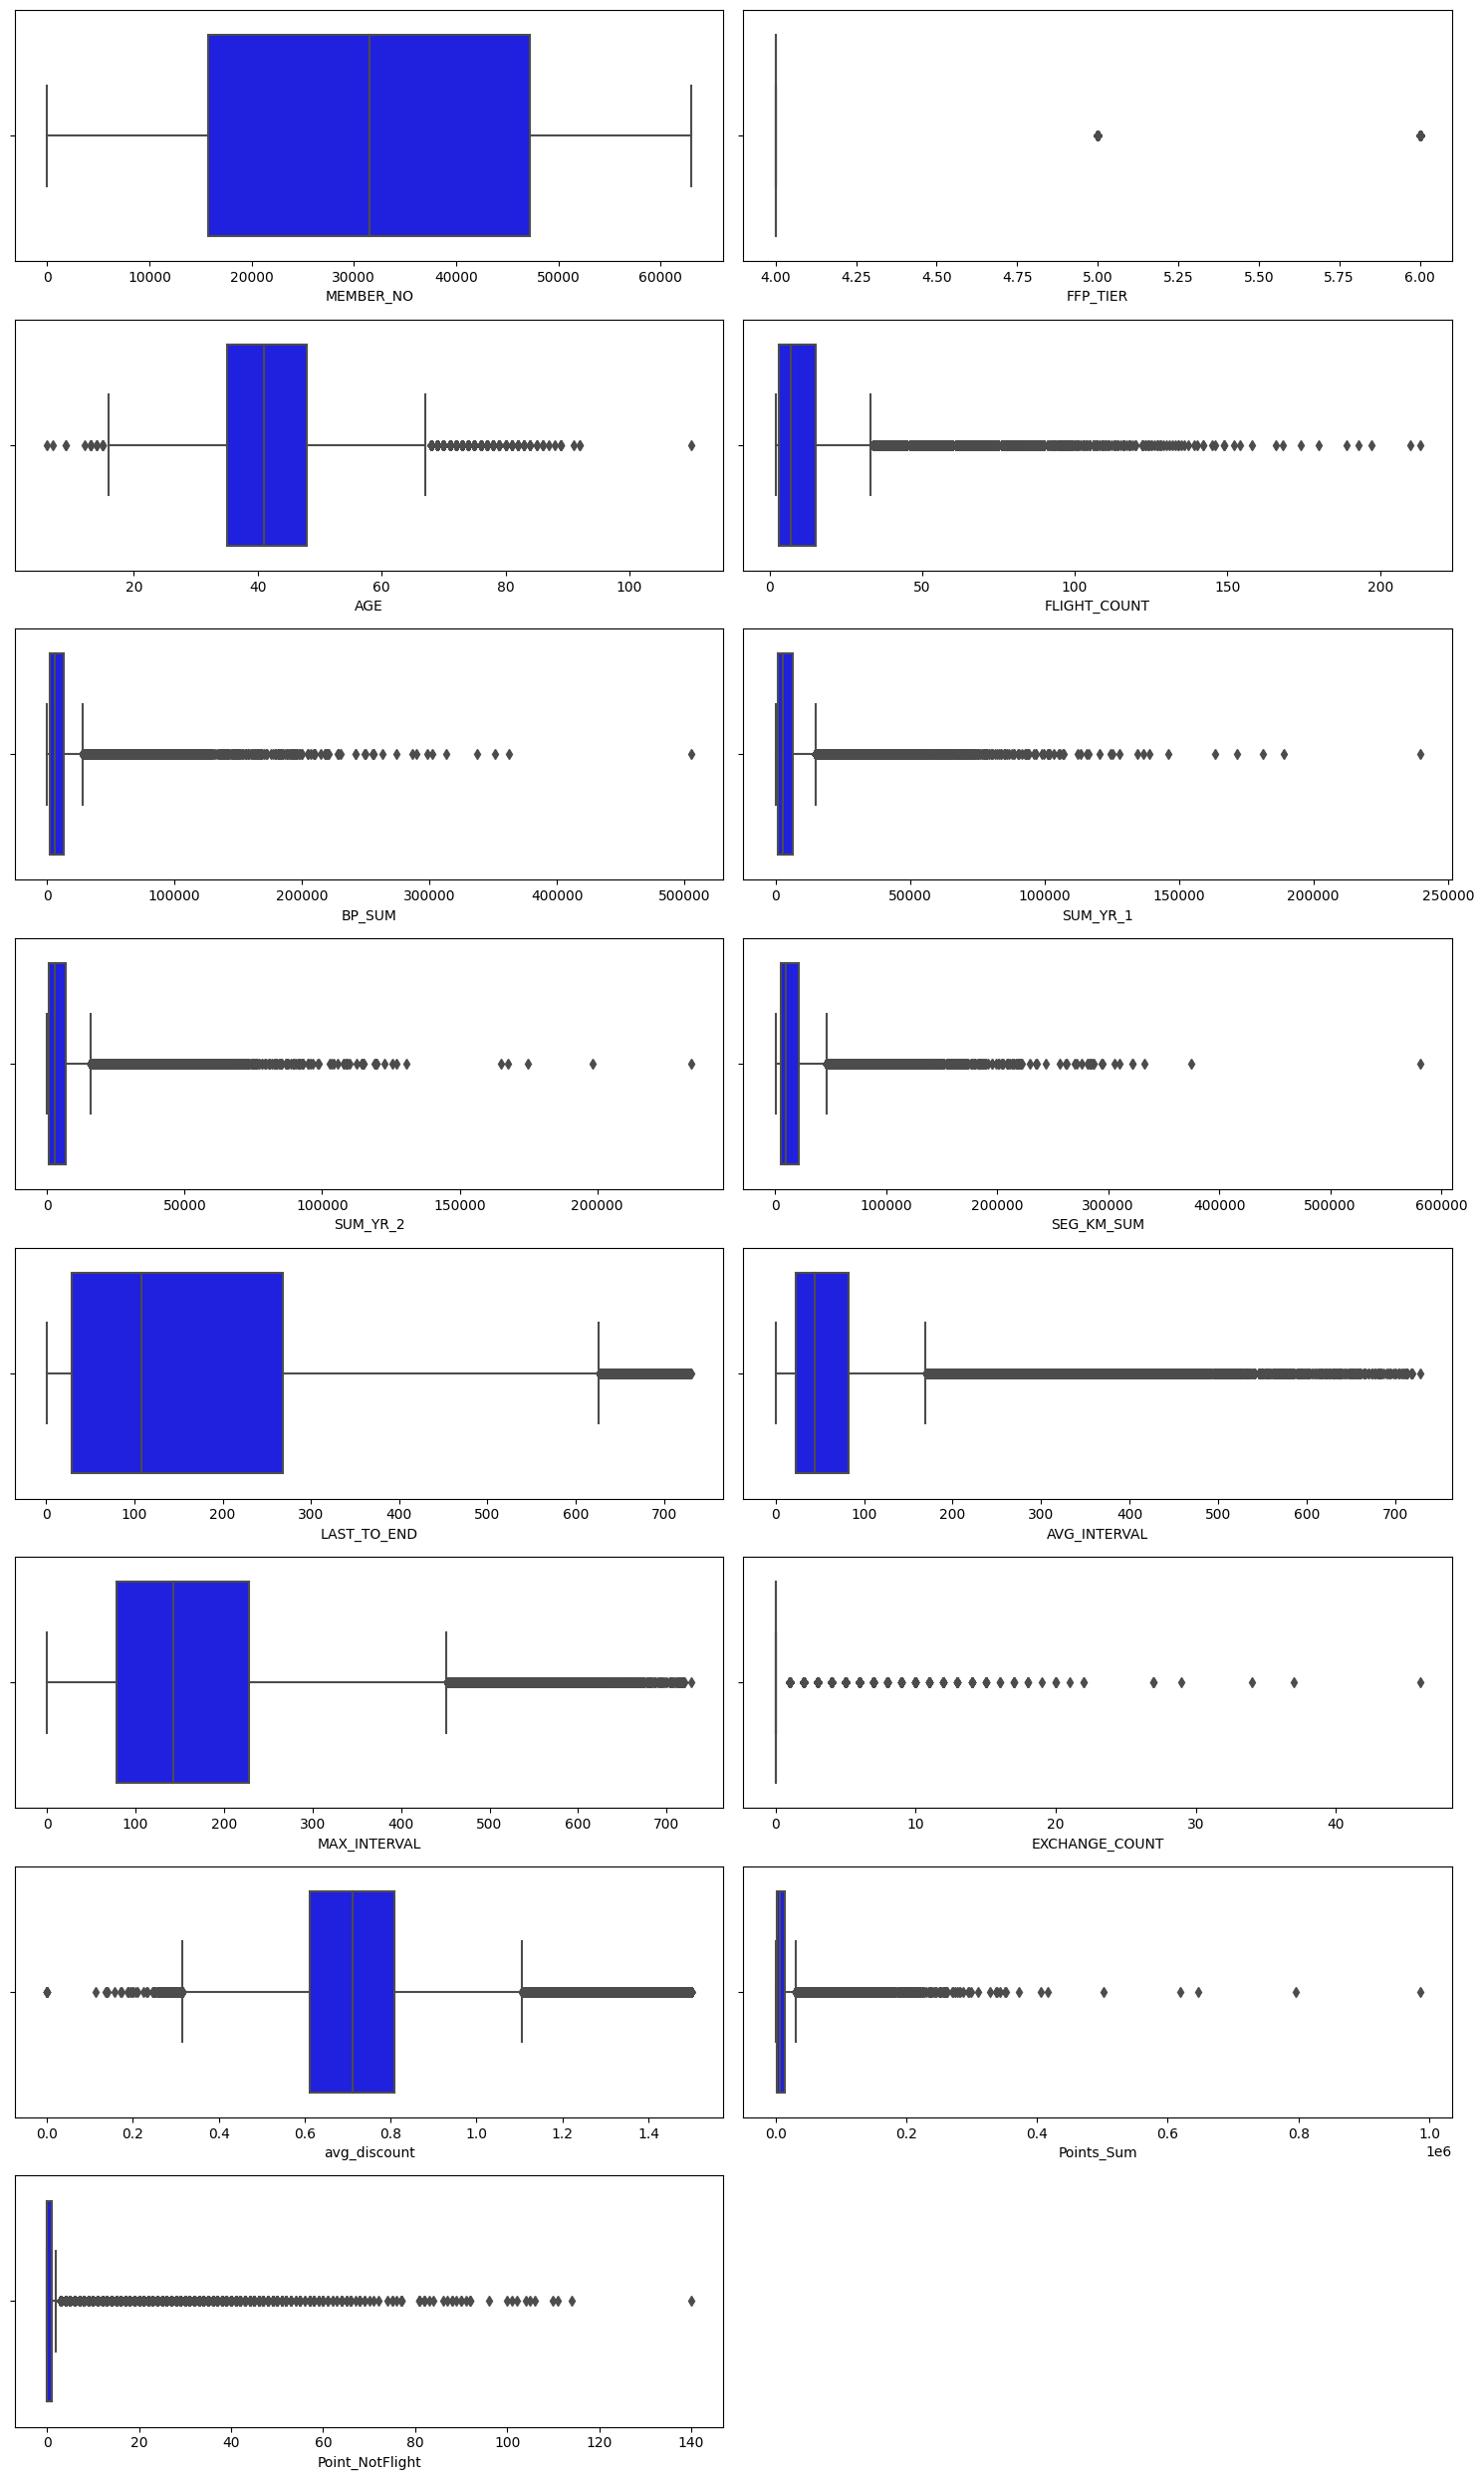

In [ ]:
# Univariate
plt.figure(figsize=(15, 25))
for i in range(0, len(cont)):
    plt.subplot(8, 2, i+1)
    sns.boxplot(x=df[cont[i]], color='blue')
    plt.tight_layout()

plt.show()

- Dari grafik di atas dapat diketahui bahwa terdapat banyak outlier pada data. Hal ini menunjukkan bahwa untuk penggunaan modeling dengan penghitungan jarak di masa mendatang, sangat disarankan untuk melakukan scaling.

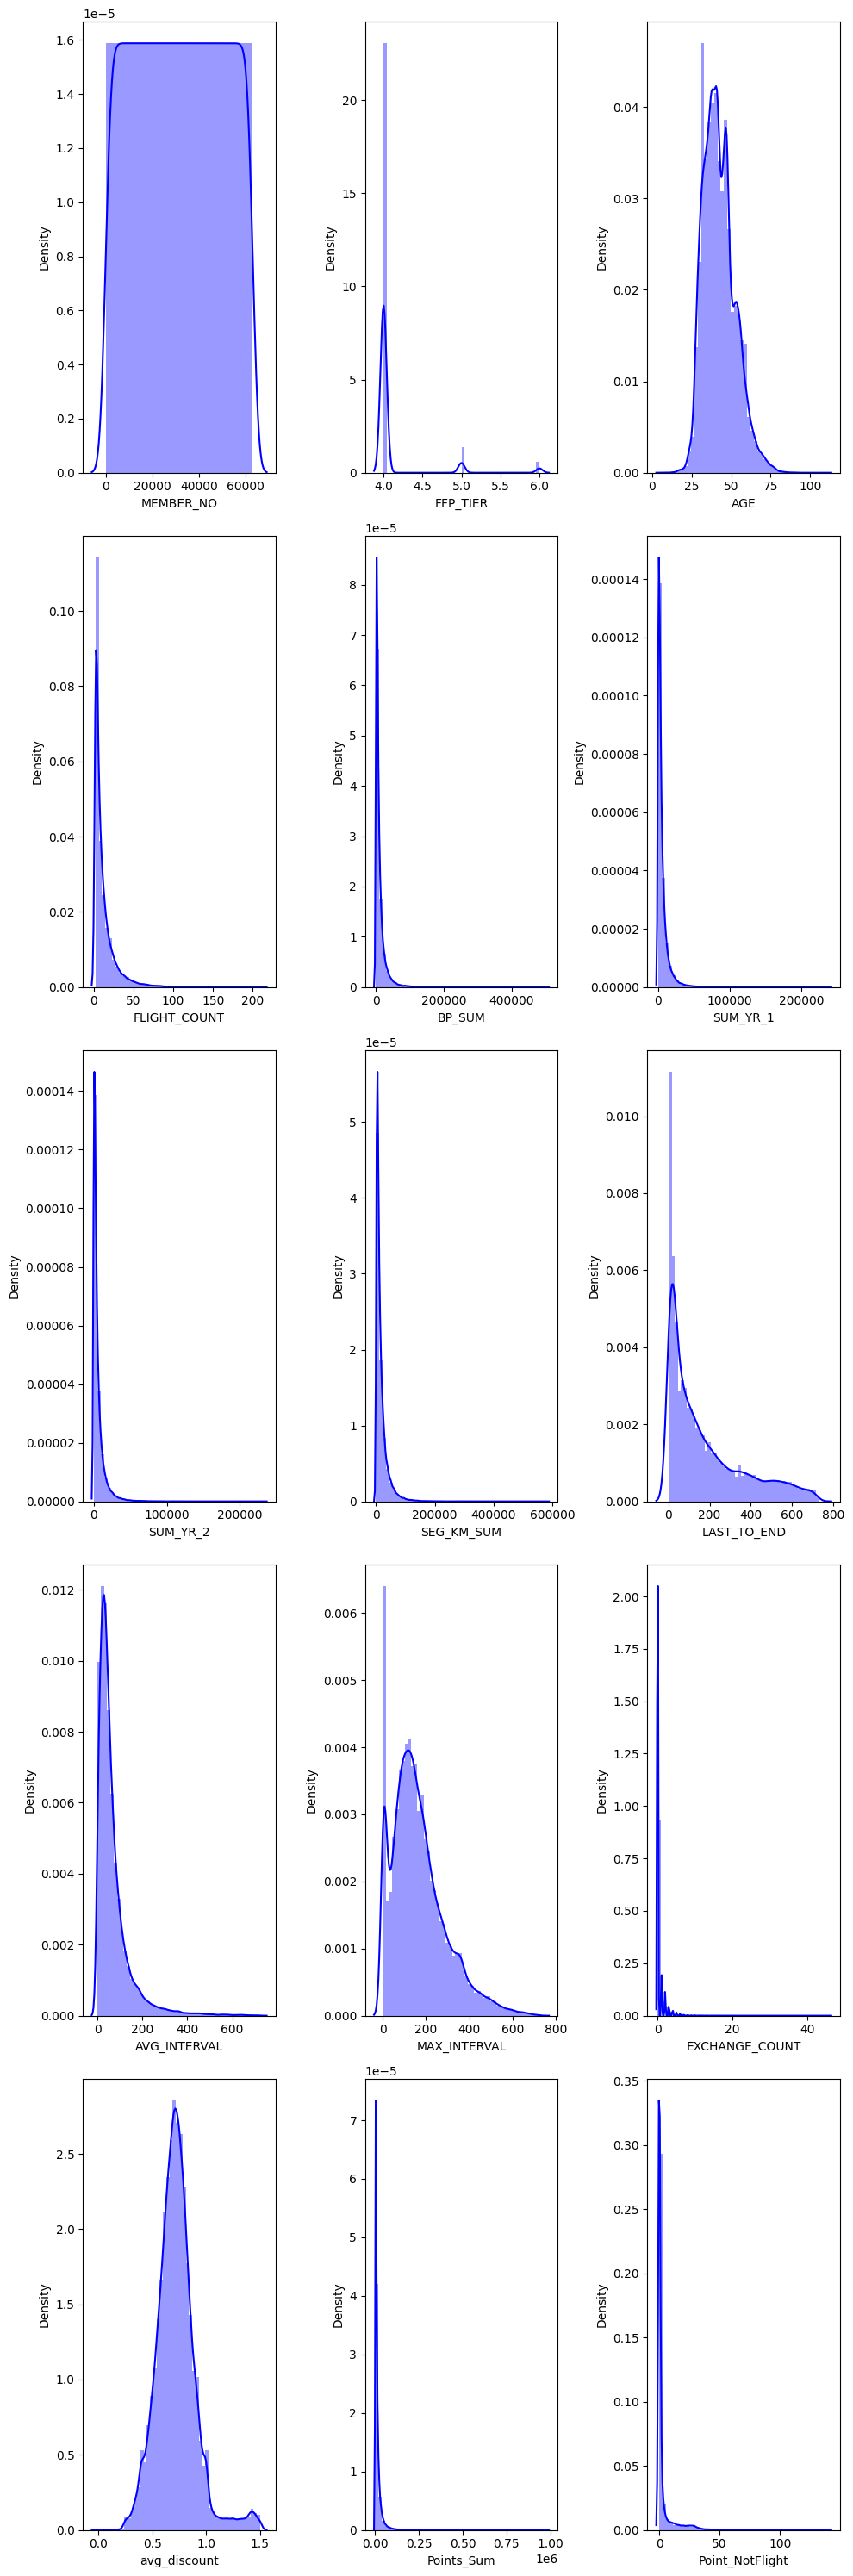

In [ ]:
plt.figure(figsize=(10, 30))
for i in range(0, len(cont)):
    plt.subplot(5, 3,i+1)
    sns.distplot(df[cont[i]], color='blue')
    plt.tight_layout()

- Mayoritas data berbentuk positively skewed.

<Axes: >

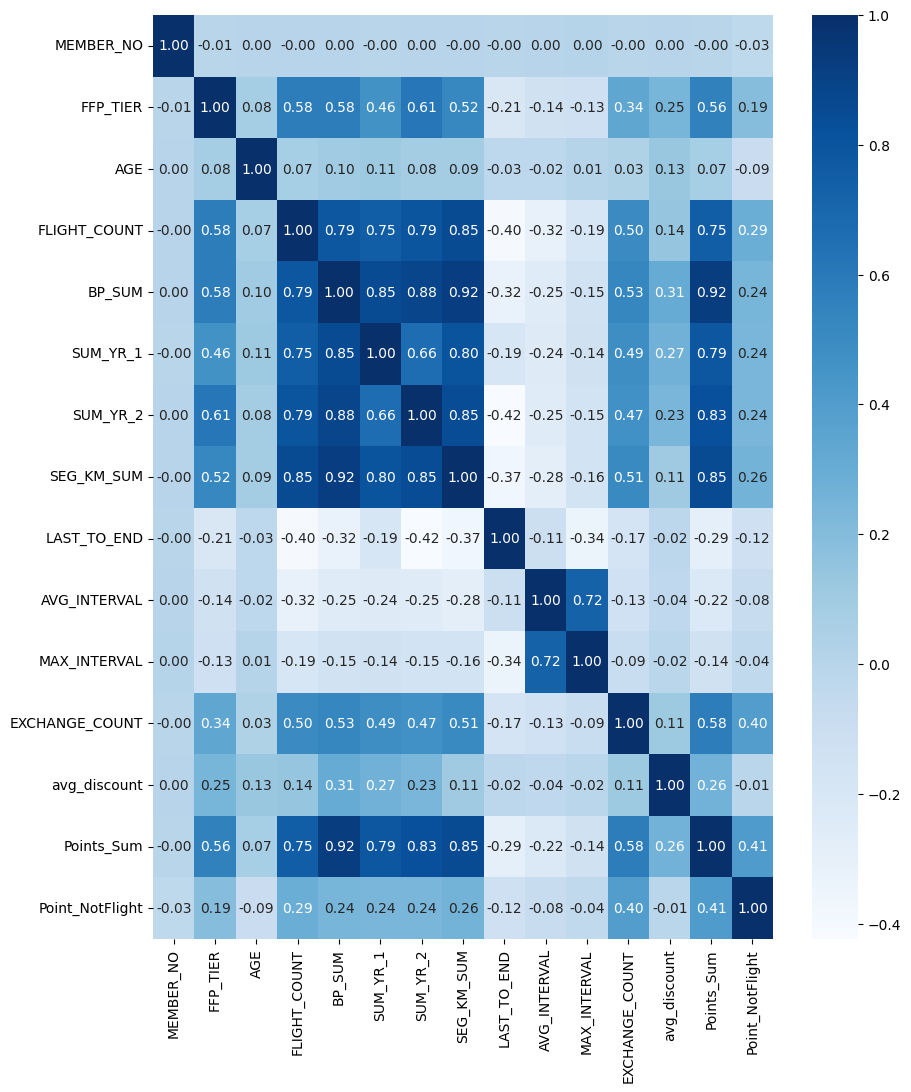

In [ ]:
#Multivariate

plt.figure(figsize=(10, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

**Menentukan fitur  untuk digunakan sebagai fitur clustering.**

Untuk mencari fitur yang digunakan untuk fitur clustering kami menggunakan konsep alur proses pemasaran atau **Marketing Journey** yang terdiri dari 3 tahap yakni:
- TOFU: Bagian awal alur (Top of the Funnel). Jika dalam konteks member, dapat dikatakan bahwa ini adalah saat seorang user mulai  bergabung ke maskapai dan menjadi anggota. Fitur yang cocok :  (FFP_DATE)
- MOFU: Bagian tengah alur (Middle of the Funnel).
ini adalah saat user sudah menjadi member maskapai dan menggunakan manfaat membership. Fitur yang cocok : Rata-rata Diskon (AVG_DISCOUNT), Total Poin (POINTS_SUM)
- BOFU: Bagian bawah/akhir alur (Bottom of the Funnel) adalah langkah di mana user menggunakan membershipnya lebih lanjut karena mereka merasa manfaatnya sangat bermanfaat bagi mereka. Fitur yang cocok : Jumlah KM Terbang (SEG_KM_SUM), Jumlah Penerbangan (FLIGHT_COUNTS), Interval Rata-rata (AVG_INTERVAL), point yang tidak digunakan (Point_NotFlight)

In [ ]:
df_pilihan = df[['FFP_DATE','avg_discount','Points_Sum','Point_NotFlight','SEG_KM_SUM','FLIGHT_COUNT','AVG_INTERVAL']]
df_pilihan

FFP_DATE  avg_discount  Points_Sum  Point_NotFlight  SEG_KM_SUM  \
0     2006-11-02      0.961639      619760               50      580717   
1     2007-02-19      1.252314      415768               33      293678   
2     2007-02-01      1.254676      406361               26      283712   
3     2008-08-22      1.090870      372204               12      281336   
4     2009-04-10      0.970658      338813               39      309928   
...          ...           ...         ...              ...         ...   
62983 2011-05-20      0.000000       12318               22        1134   
62984 2010-03-08      0.000000      106972               43        8016   
62985 2006-03-30      0.000000           0                0        2594   
62986 2013-02-06      0.000000           0                0        3934   
62987 2013-02-17      0.000000           0                0        4222   

       FLIGHT_COUNT  AVG_INTERVAL  
0               210      3.483254  
1               140      5.194245  
2               135      5.298507  
3                23     27.863636  
4               152      4.788079  
...             ...           ...  
62983             2      4.000000  
62984             4     37.000000  
62985             2    166.000000  
62986             2     12.000000  
62987             2      6.000000  

[62988 rows x 7 columns]

**Data Scaling**<br>
Karena data memiliki banyak outlier, maka kami melakukan scalling untuk meminimalkan dampak outlier. Dengan MinMAxScaler karena pada plot distribusi pada analisis univariat di atas, sebagian besar data tidak terdistribusi secara normal.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for i in df_pilihan:
            df_pilihan[i] = MinMaxScaler().fit_transform(df_pilihan[i].values.reshape(len(df_pilihan), 1))

In [ ]:
df_pilihan.head()

FFP_DATE  avg_discount  Points_Sum  Point_NotFlight  SEG_KM_SUM  \
0  0.237956      0.641093    0.628833         0.357143    1.000000   
1  0.273438      0.834876    0.421855         0.235714    0.505403   
2  0.267578      0.836450    0.412310         0.185714    0.488230   
3  0.452474      0.727246    0.377653         0.085714    0.484136   
4  0.527669      0.647105    0.343773         0.278571    0.533403   

   FLIGHT_COUNT  AVG_INTERVAL  
0      0.985782      0.004785  
1      0.654028      0.007135  
2      0.630332      0.007278  
3      0.099526      0.038274  
4      0.710900      0.006577

# 3. Lakukan clustering K-means! Temukan jumlah cluster yang menurut teman-teman optimal dan evaluasi cluster yang dihasilkan dengan visualisasi dan silhouette score

a. Temukan jumlah cluster yang optimal dengan menggunakan elbow method<br>
b. Lakukan clustering menggunakan K-means<br>
c. Evaluasi cluster yang dihasilkan dengan menggunakan visualisasi, gunakan PCA
apabila diperlukan


**Menghitung Inersia**

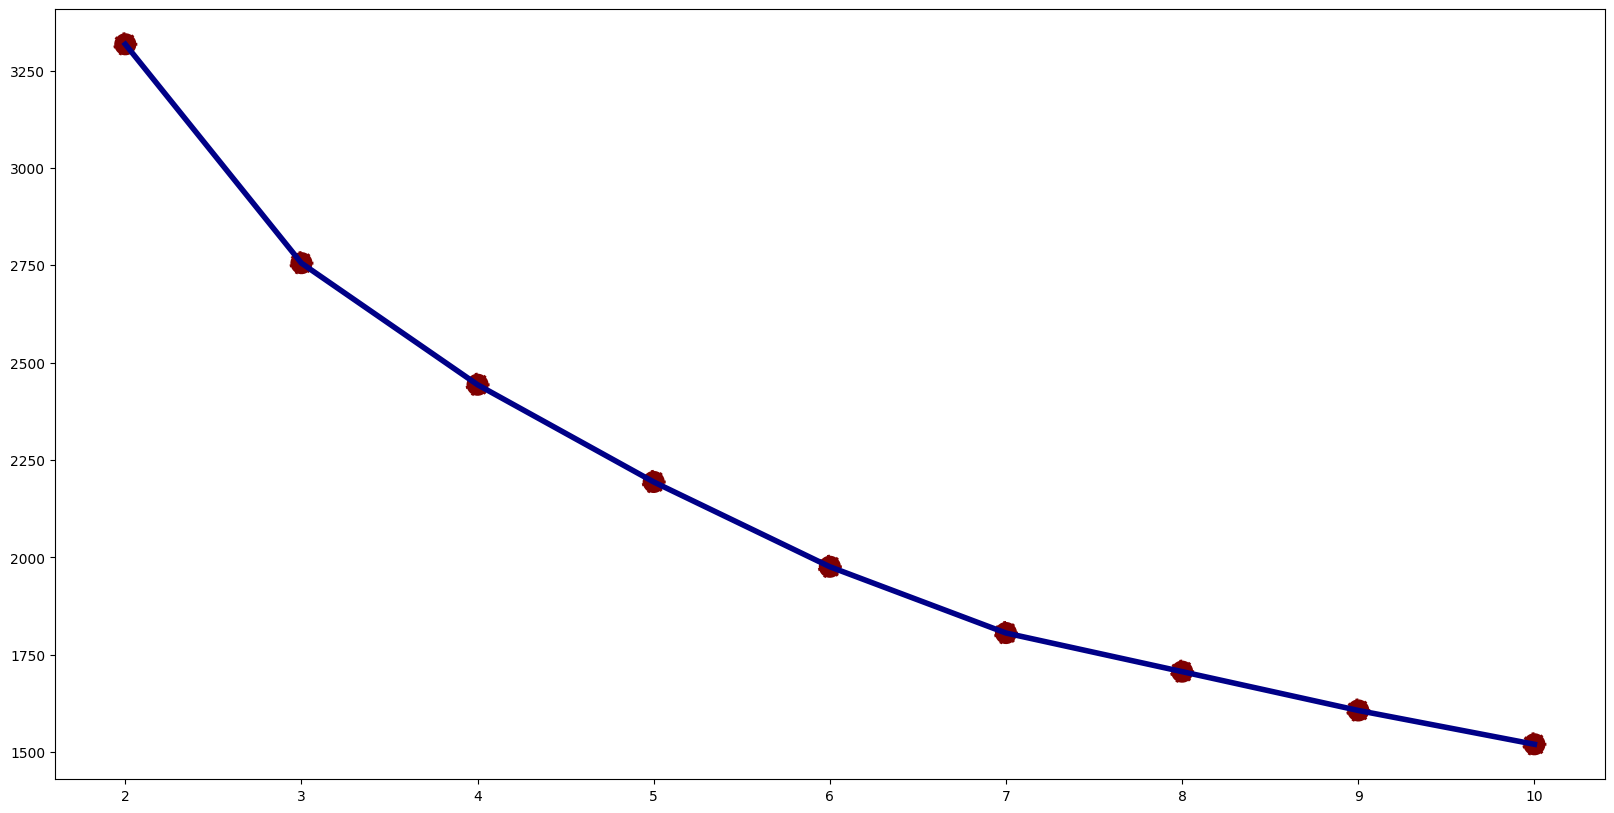

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pilihan)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

Dari grafik diatas K nya adalah 4

**Silhouette**

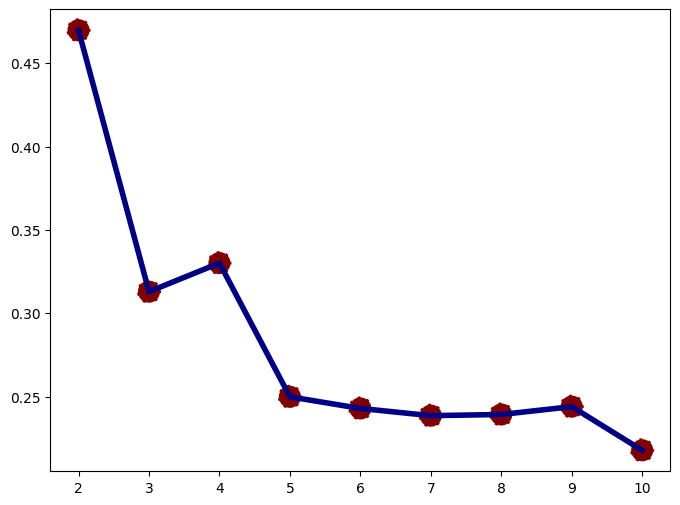

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_pilihan)
    preds = kmeans.predict(df_pilihan)

    score_euclidean = silhouette_score(df_pilihan, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)



fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

Dari hasil diatas maka nilai K yang disediakan adalah 6. Dengan kedua hasil tersebut, nilai K yang kami ambil adalah 4.

**Clustering** : K-Means

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_pilihan.values)

KMeans(n_clusters=4, random_state=0)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_pilihan)
clusters = kmeans.labels_
df_pilihan['clusters'] = clusters
df_pilihan.head()

FFP_DATE  avg_discount  Points_Sum  Point_NotFlight  SEG_KM_SUM  \
0  0.237956      0.641093    0.628833         0.357143    1.000000   
1  0.273438      0.834876    0.421855         0.235714    0.505403   
2  0.267578      0.836450    0.412310         0.185714    0.488230   
3  0.452474      0.727246    0.377653         0.085714    0.484136   
4  0.527669      0.647105    0.343773         0.278571    0.533403   

   FLIGHT_COUNT  AVG_INTERVAL  clusters  
0      0.985782      0.004785         1  
1      0.654028      0.007135         1  
2      0.630332      0.007278         1  
3      0.099526      0.038274         2  
4      0.710900      0.006577         2

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(df_pilihan)
pcs = pca.transform(df_pilihan)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['clusters'] = clusters

df_pca.head()

PC 1      PC 2  clusters
0  0.151490 -0.505191         1
1  0.146364 -0.435563         1
2  0.147034 -0.438061         1
3  1.110161 -0.077494         2
4  1.099539 -0.048878         2

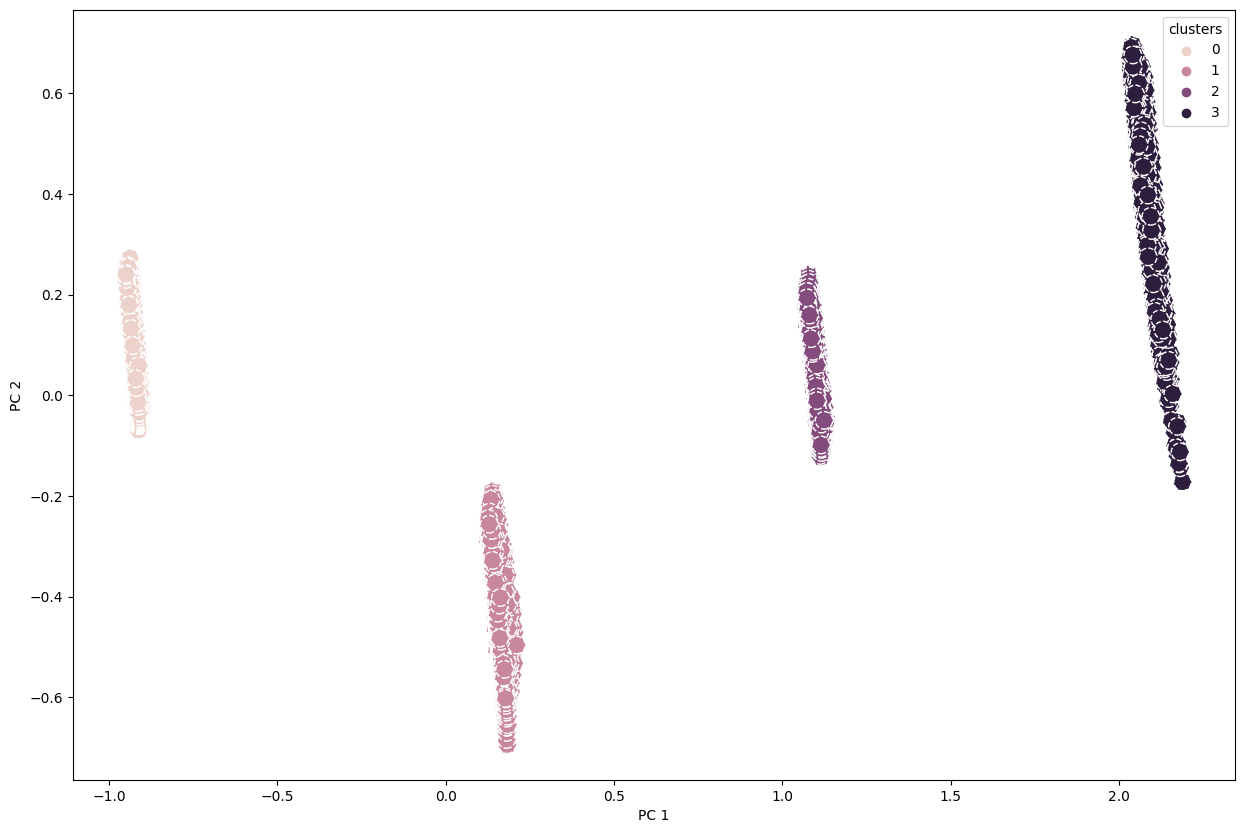

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax)

plt.show()

# 4. Interpretasi cluster yang dihasilkan secara bisnis dan berikan  rekomendasi yang sesuai dengan cluster yang dihasilkan

a. Tempelkan kembali label yang dihasilkan ke dataframe asal, dan keluarkan statistik
fitur dari setiap cluster

b. Deskripsikan secara kontekstual customer seperti apa yang ada di masing-masing
cluster

c. Berdasarkan cluster tersebut, berikan 1-2 rn



In [ ]:
df_clean = df.copy()

kmeans = KMeans(n_clusters=4, random_state=0).fit(df_pilihan)
clusters = kmeans.labels_
df_clean['clusters'] = clusters
df_clean.head()

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993 2006-11-02        2008-12-24   Male         6            .   
1      28065 2007-02-19        2007-08-03   Male         6      Unknown   
2      55106 2007-02-01        2007-08-30   Male         6            .   
3      21189 2008-08-22        2008-08-23   Male         5  Los Angeles   
4      39546 2009-04-10        2009-04-15   Male         6      guiyang   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SEG_KM_SUM  \
0       beijing           CN  31.0 2014-03-31  ...      580717   
1       beijing           CN  42.0 2014-03-31  ...      293678   
2       beijing           CN  40.0 2014-03-31  ...      283712   
3            CA           US  64.0 2014-03-31  ...      281336   
4       guizhou           CN  48.0 2014-03-31  ...      309928   

   LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL EXCHANGE_COUNT  \
0         3/31/2014            1      3.483254            18             34   
1         3/25/2014            7      5.194245            17             29   
2         3/21/2014           11      5.298507            18             20   
3        12/26/2013           97     27.863636            73             11   
4         3/27/2014            5      4.788079            47             27   

   avg_discount  Points_Sum  Point_NotFlight  clusters  
0      0.961639      619760               50         2  
1      1.252314      415768               33         2  
2      1.254676      406361               26         2  
3      1.090870      372204               12         0  
4      0.970658      338813               39         0  

[5 rows x 24 columns]

In [40]:
display(df_clean.groupby('clusters').agg(['mean','median']))


MEMBER_NO                               FFP_DATE             \
                  mean   median                          mean     median   
clusters                                                                   
0         31380.591164  30910.0 2009-07-08 07:27:41.718611456 2009-08-11   
1         32167.294413  32783.5 2012-03-09 10:55:23.617110272 2012-04-12   
2         30118.359823  29320.5 2006-10-02 21:16:17.483443712 2006-11-05   
3         32384.945391  32564.0 2011-04-16 20:06:05.634782720 2011-07-23   

                     FIRST_FLIGHT_DATE             FFP_TIER               AGE  \
                                  mean     median      mean median       mean   
clusters                                                                        
0        2010-02-21 03:58:57.831923968 2010-01-20  4.112484    4.0  43.505234   
1        2012-05-30 04:02:04.397380608 2012-06-28  4.067403    4.0  40.040059   
2        2007-08-20 22:34:28.211920384 2007-05-23  4.176876    4.0  46.439501   
3        2011-08-31 04:41:59.373913088 2012-01-08  4.011826    4.0  40.554087   

                 ... MAX_INTERVAL        EXCHANGE_COUNT        avg_discount  \
         median  ...         mean median           mean median         mean   
clusters         ...                                                          
0          42.0  ...   161.389556  142.0       0.393932    0.0     0.732156   
1          38.0  ...   146.548662  131.0       0.112199    0.0     0.705879   
2          45.0  ...   163.584299  141.0       0.701711    0.0     0.745370   
3          39.0  ...   400.267826  384.0       0.030609    0.0     0.695728   

                      Points_Sum         Point_NotFlight         
            median          mean  median            mean median  
clusters                                                         
0         0.718665  13820.580283  7333.0        2.986161    0.0  
1         0.701743  10015.698899  5702.5        2.280375    0.0  
2         0.725000  17863.790563  8963.0        3.452539    0.0  
3         0.690000   3498.095304  2008.0        2.029565    0.0  

[4 rows x 36 columns]

###***Deskripsi dari masing-masing cluster***


Deskripsi clustering sesuai dengan pemasaran atau Marketing Journey yang terdiri dari 3 tahap yakni:
1.  Cluster 0 : Bisa disebut sebagai  customer TOFU (user baru maskapai) karena bisa dilihat dari rata-rata FFP_DATE memiliki angka yang tinggi (0.87)
2. Cluster 1 : Bisa disebut sebagai customer BOFU (user sudah lama maskapai) karena dari semua data memiliki rata-rata yang cukup tinggi dibandingkan dengan cluster yang lain dari segi total jarak penerbangan (seg_km_sum), diskon yan di gunakan (avg_interval).
3. Cluster 2 : Bisa disebut sebagai customer MOFU (user yang cukup lama maskapai ) karena dapat dilihat dari rata-rata nya yang memiliki angka tinggi ke dua dari masing-masing feature.
4. Cluster 3 : Bisa disebut customer yang masih sangat baru sebagai user maskapai yang belum banyak memiliki perjalan dan benefit yang di dapatkan.  

###***Business Rekomendesi***

1. Bisa memberikan diskon, upgrade membership, dan pelayan terbaik bagi customer seperti BOFU & MOFU(yang sudah lama & cukup lama) untuk tetap terus tetap berlangganan.
2. Memberikan diskon, poin, dan pelayanan yang terbaik bagi customer seperti TOFU & yang baru bergabung untuk dapat membuat customer ingin terus berlangganan.